<a href="https://colab.research.google.com/github/prachiisalunkhe/Plant-species-detection/blob/main/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

directory_path = '/content/drive/MyDrive/datasets/Tree_Species_Dataset'
try:
  print(f"contents of {directory_path}:")
  for item in os.listdir(directory_path):
    print(item)
except FileNotFoundError:
  print(f"Error: The directory '{directory_path}' was not found.")
except Exception as e:
  print(f"An error occured: {e}")

contents of /content/drive/MyDrive/datasets/Tree_Species_Dataset:
sugarcane
other
saptaparni
sonmahor
sitafal
pilikaren
simlo
pipal
shirish
vad
kanchan
mango
khajur
nilgiri
kesudo
gunda
neem
motichanoti
gulmohor
jamun
coconut
cactus
champa
bili
babul
garmalo
banyan
bamboo
asopalav
amla
.git


In [ ]:
file_path = '/content/drive/MyDrive/TreeSpecies'

In [ ]:
import os

repo_path = "Tree_species"  # Corrected directory name
print("Contents:", os.listdir(repo_path))

Contents: ['5M_trees', 'streamlit_integrated.py', '.gitattributes', 'README.md', 'tree_CNN.ipynb', '.git', 'Tree_Species_Dataset', '5M_trees.ipynb']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 8


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 42


In [ ]:
import pandas as pd
import os # Import os to use os.path.isdir

class_counts = {}
for cls in os.listdir(repo_path):
    class_path = os.path.join(repo_path, cls)
    if os.path.isdir(class_path): # Check if it's a directory
        class_counts[cls] = len(os.listdir(class_path))

class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

                      Image Count
Tree_Species_Dataset           30
.git                           11
5M_trees                        1
shape:  (3, 1)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os # Import os for os.path.join and os.listdir

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(repo_path, class_dir)
        if os.path.isdir(class_path): # Ensure it's a directory
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if image_files: # Check if there are image files in the directory
                img_path = os.path.join(class_path, image_files[0])
                try:
                    img = Image.open(img_path)
                    plt.subplot(1, n, i+1)
                    plt.imshow(img)
                    plt.title(class_dir)
                    plt.axis('off')
                except UnidentifiedImageError:
                    print(f"Could not identify image file: {img_path}")
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")
            else:
                print(f"No image files found in directory: {class_path}")
    plt.show()

show_sample_images(repo_path, class_dirs)

No image files found in directory: Tree_species/5M_trees


<Figure size 1500x1000 with 0 Axes>

In [ ]:
image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path): # Check if it's a directory
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')): # Check for image file extensions
                img_path = os.path.join(class_path, img_file)
                try:
                    img = Image.open(img_path)
                    image_shapes.append(img.size)
                except UnidentifiedImageError:
                    print(f"Could not identify image file: {img_path}")
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.head())

Empty DataFrame
Columns: [Width, Height]
Index: []


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os # Import os for os.path.join and os.listdir

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        class_path = os.path.join(repo_path, class_dir)
        if os.path.isdir(class_path): # Ensure it's a directory
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if image_files: # Check if there are image files in the directory
                img_path = os.path.join(class_path, image_files[0])
                try:
                    img = Image.open(img_path)
                    plt.subplot(1, n, i+1)
                    plt.imshow(img)
                    plt.title(class_dir)
                    plt.axis('off')
                except UnidentifiedImageError:
                    print(f"Could not identify image file: {img_path}")
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")
            else:
                print(f"No image files found in directory: {class_path}")
    plt.show()

show_sample_images(repo_path, class_dirs)

No image files found in directory: Tree_species/5M_trees


<Figure size 1500x1000 with 0 Axes>

In [ ]:
import hashlib
from collections import defaultdict
import os # Import os for os.path.join and os.path.isdir

hashes = defaultdict(list)

for item_name in os.listdir(repo_path): # Iterate through items in repo_path
    item_path = os.path.join(repo_path, item_name)
    if os.path.isdir(item_path): # Check if the item is a directory
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)
            # Add a check here to ensure it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")


# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path): # Check if it's a directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Add a check here to ensure it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 0 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for item_name in os.listdir(repo_path): # Iterate through items in repo_path
    item_path = os.path.join(repo_path, item_name)
    if os.path.isdir(item_path): # Check if the item is a directory
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)
            # Add a check here to ensure it's a file before trying to open
            if os.path.isfile(img_path):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")


duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd
import os

# Path to the directory containing the tree species image dataset on Google Drive
image_dataset_path = '/content/drive/MyDrive/datasets/Tree_Species_Dataset'

# Gather image info
image_info = []

# Iterate through the class directories within the dataset path
for class_name in os.listdir(image_dataset_path):
    class_path = os.path.join(image_dataset_path, class_name)
    if os.path.isdir(class_path): # Check if the item is a directory (representing a class)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Add a check here to ensure it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_name # Use the class directory name as the label
                        })
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)

# Define thresholds for small and large images (you can adjust these)
small_imgs = df_sizes[(df_sizes['width'] < 100) | (df_sizes['height'] < 100)] # Adjusted thresholds for example
large_imgs = df_sizes[(df_sizes['width'] > 500) | (df_sizes['height'] > 500)]   # Adjusted thresholds for example


print(f"Total images processed: {len(df_sizes)}")
print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

# Optional: Display info about a few small and large images
# print("\nSample of very small images:")
# if not small_imgs.empty:
#     display(small_imgs.head())
# else:
#     print("No very small images found.")

# print("\nSample of very large images:")
# if not large_imgs.empty:
#     display(large_imgs.head())
# else:
#     print("No very large images found.")

Total images processed: 1600
🔻 Very small images: 0
🔺 Very large images: 136


<Figure size 1500x300 with 0 Axes>

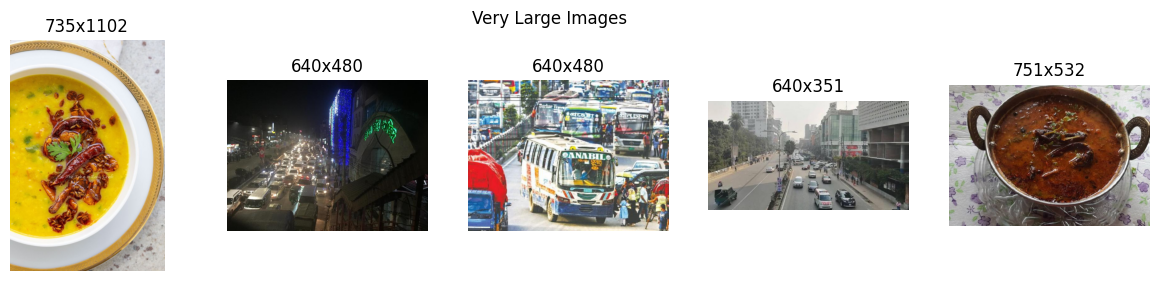

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 136 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

# Path to the directory containing the tree species image dataset on Google Drive
image_dataset_path = '/content/drive/MyDrive/datasets/Tree_Species_Dataset'

# Iterate through the class directories within the dataset path
for class_name in os.listdir(image_dataset_path):
    class_path = os.path.join(image_dataset_path, class_name)
    if os.path.isdir(class_path): # Check if the item is a directory (representing a class)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Add a check here to ensure it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_name # Use the class directory name as the label
                        })
                except Exception as e:
                    print(f"An error occurred while processing {img_path}: {e}")

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1464.000000  1464.000000
mean    248.743852   213.616120
std      46.562484    43.495761
min     141.000000   128.000000
25%     224.000000   183.000000
50%     259.000000   194.000000
75%     275.000000   233.000000
max     500.000000   500.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 3 classes.
Found 320 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9082 - loss: 0.1687 - val_accuracy: 1.0000 - val_loss: 1.2107e-07
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 1.0000 - loss: 4.5973e-06 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 1.0000 - loss: 3.1565e-06 - val_accuracy: 1.0000 - val_loss: 1.6391e-08
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 1.0000 - loss: 7.3365e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 1.0000 - loss: 9.1810e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 1.0000 - loss: 4.6278e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 1.0000 - loss: 1.4464e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accura

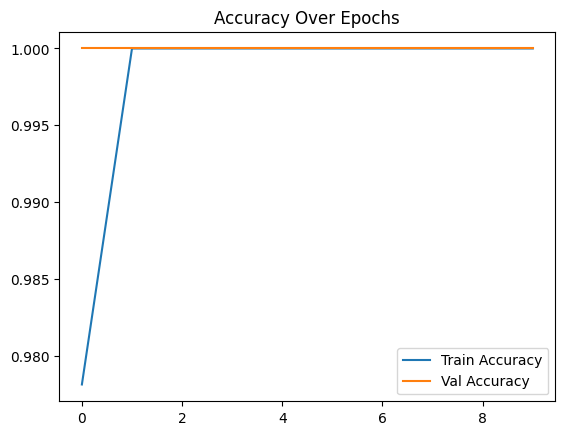

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1280 images belonging to 3 classes.
Found 320 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.9180 - loss: 0.1153 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accura

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


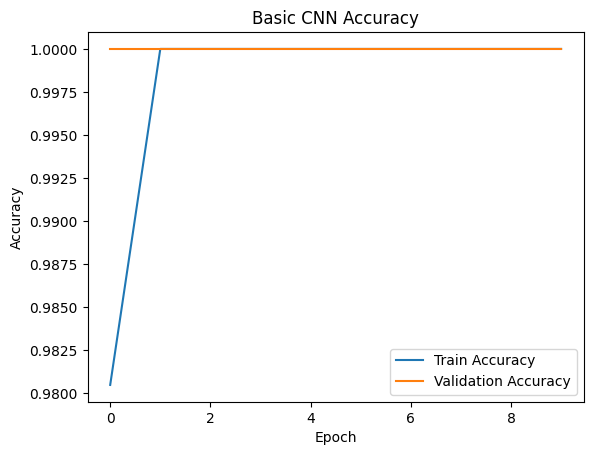

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Use num_classes from the generator
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.9361 - loss: 0.2890 - val_accuracy: 0.0000e+00 - val_loss: 28.9702
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 250s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 48.3760
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 57.3270
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 1.0000 - loss: 2.3968e-10 - val_accuracy: 0.0000e+00 - val_loss: 57.8408
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 51.2530
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 268s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 38.4758
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 247s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 21.7360
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step -